# Домашня робота №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Класи для 3D графіків

In [6]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
#%matplotlib notebook

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [14]:
from scipy.stats import multivariate_normal


def plot_normal(mu, cov, x, y):
    X, Y = np.meshgrid(x, y)
    Z = multivariate_normal(mean=mu, cov=cov).pdf(np.dstack((X, Y)))
    
    fig = plt.figure(figsize=(20, 6))

    axis_1 = fig.add_subplot(121, projection='3d')
    surface = axis_1.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(surface, shrink=0.5, aspect=5)

    axis_2 = fig.add_subplot(122)
    contour = axis_2.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(contour)
    plt.show()

### 2.1 Зміна матриці коваріацій

#### 2.1.1 Завдання 2.1.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.$$

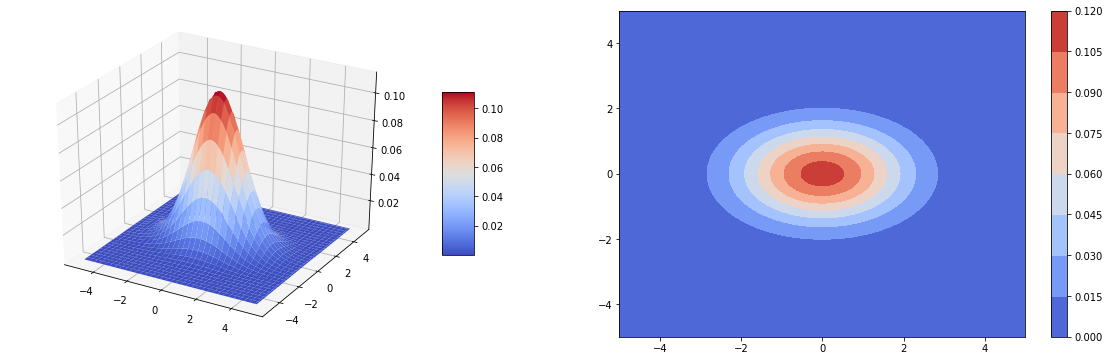

In [17]:
plot_normal([0, 0], [[2, 0],[0, 1]], np.arange(-5, 5.1, 0.1), np.arange(-5, 5.1, 0.1))

#### 2.1.2 Завдання 2.1.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 1 \\ -1\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}.$$

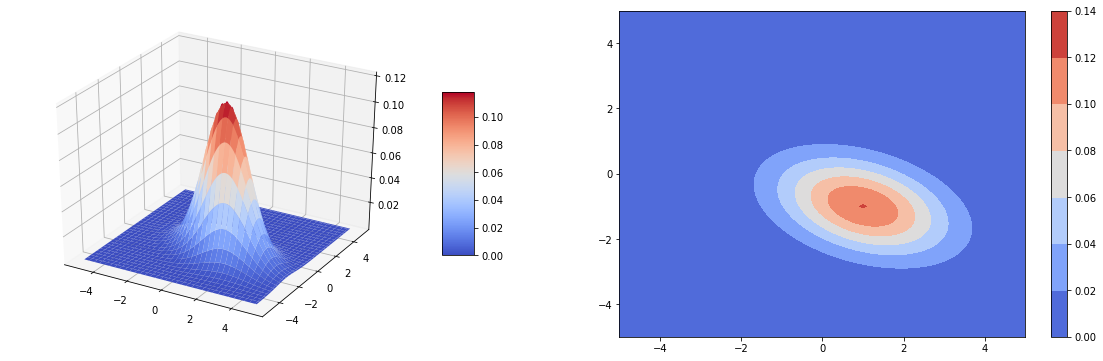

In [16]:
plot_normal([1, -1], [[2, -0.5],[-0.5, 1]], np.arange(-5, 5.1, 0.1), np.arange(-5, 5.1, 0.1))

## 3 Некорельованість не означає незалежність

### 3.1 Задача 1.16.13

Нехай $Z = X Y$, де $X \sim N(0, 1)$ не залежить від $Y$ і $P(Y = 1) = P(Y = -1) = \frac{1}{2}$.
Покажіть, що $Z \sim N(0, 1)$ і що $X$ та $Z$ некорельовані, але залежні.
Знайдіть розподіл пар $(X, Z)$ та $(Y, Z)$, а також розподіл $X + Z$.

1. Згенеруйте $n = 100000$ значень випадкових величин $X, Y$;
2. Отримайте $n = 100000$ значень випадкової величини $Z$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $Z$;
   - функцію щільності випадкової величини $Z$.
4. Виведіть матрицю коваріацій між значеннями випадкових величин $X$ та $Z$.
5. Для значень $X$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $Y$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Зобразіть на графіку:
   - нормовану гістограму $n = 100000$ значень випадкової величини $X+Z$;
   - функцію щільності випадкової величини $X+Z$.

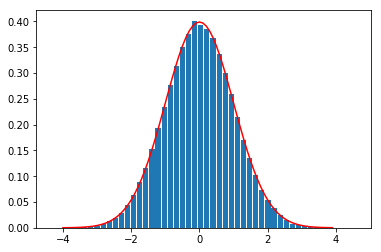

Covariation matrix:
 [[1.00305205 0.0047777 ]
 [0.0047777  1.00305445]]


In [108]:
from scipy.stats import bernoulli, norm

def task(n):
    x = norm(0, 1)
    y = bernoulli(p=0.5)
    rvs_x = x.rvs(size=n)
    rvs_y = y.rvs(size=n)*2 - 1
    rvs_z = rvs_x*rvs_y
    
    plt.hist(rvs_z, density=True, rwidth=0.85, bins=50)
    plt.plot(np.arange(-4, 4, 0.1), x.pdf(np.arange(-4, 4, 0.1)), 'r')
    plt.show()
    print("Covariation matrix:\n", np.cov(rvs_x, rvs_z))
    return rvs_x,rvs_y,rvs_z

rvs_x, rvs_y, rvs_z = task(100000)


def plot_hist_contour(x, y, x_range, y_range, n = 100_000 , n_bins= 100):
    fig = plt.figure(figsize=(20, 5))
    axis_1 = fig.add_subplot(131, projection='3d')
    axis_2 = fig.add_subplot(132)
    
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=n_bins, range=[x_range, y_range])

    x_pos_, y_pos_ = np.meshgrid(x_edges[:-1] + 0.125, y_edges[:-1] + 0.125, indexing="ij")
    x_pos = x_pos_.ravel()
    y_pos = y_pos_.ravel()

    dx = dy = 0.2 * np.ones_like(0)
    dz = hist.ravel()
    x_len = (x_range[1] - x_range[0]) / n_bins
    y_len = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (n * x_len * y_len)

    colors = cm.get_cmap('viridis', 8)
    axis_1.bar3d(x_pos, y_pos, 0, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    normed_hist = hist/(n*x_len*y_len)
    axis_2.contourf(x_pos_, y_pos_, normed_hist, cmap=colors)

    axis_3 = fig.add_subplot(133)
    axis_3.axis(x_range + y_range)
    axis_3.plot(x, y, 'o', markersize=0.1)
    
    plt.show()


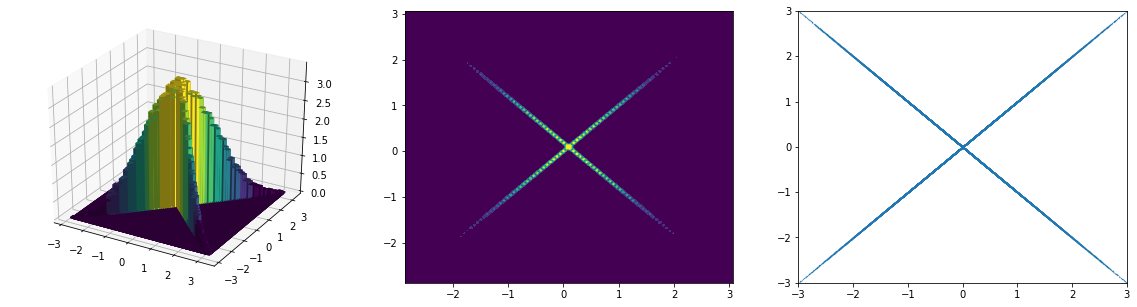

In [71]:
plot_hist_contour(rvs_x, rvs_z, [-3, 3], [-3, 3], 100_000, 100)

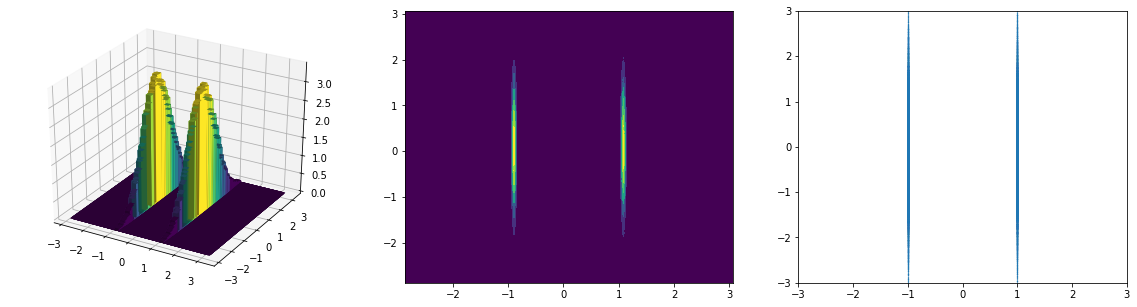

In [70]:
plot_hist_contour(rvs_y, rvs_z, [-3, 3], [-3, 3], 100_000, 100)

## 4 Незалежність випадкових величин з Домашньої роботи №8

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= \frac{\xi_1}{\xi_1 + \xi_2} \sim Uniform(0, 1), \\
\zeta_2 &= \xi_1 + \xi_2 \sim \Gamma(2)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних випадкових величин $\eta_1 \sim Uniform(0, 1), \eta_2 \sim \Gamma(2)$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

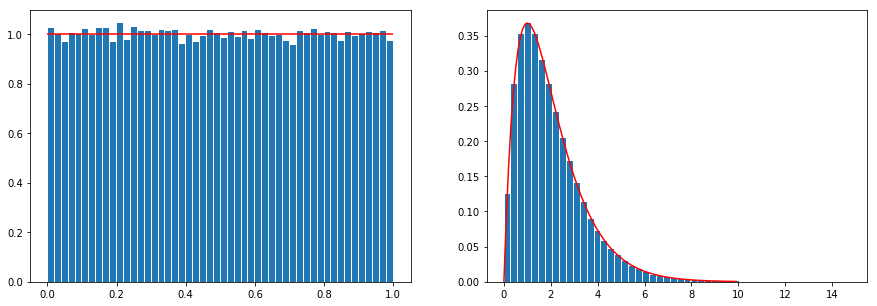

In [76]:
from scipy.stats import expon, gamma, uniform

def task_3(n):
    fig = plt.figure(figsize=(15, 5))
    axis_1 = fig.add_subplot(121)
    axis_2 = fig.add_subplot(122)

    ksi = expon(0, 1)

    rvs_1 = ksi.rvs(size=n)
    rvs_2 = ksi.rvs(size=n)
    rvs_z_1 = rvs_1/(rvs_1 + rvs_2)
    rvs_z_2 = rvs_1 + rvs_2

    axis_1.hist(rvs_z_1, density=True, rwidth=0.85, bins=50)
    axis_1.hlines(1, 0, 1, 'r')
    axis_2.hist(rvs_z_2, density=True, rwidth=0.85, bins=50)
    axis_2.plot(np.arange(0, 10, 0.1), gamma.pdf(np.arange(0, 10, 0.1), 2), 'r')
    plt.show()
    return rvs_z_1, rvs_z_2

rvs_z_1, rvs_z_2 = task_3(100_000)

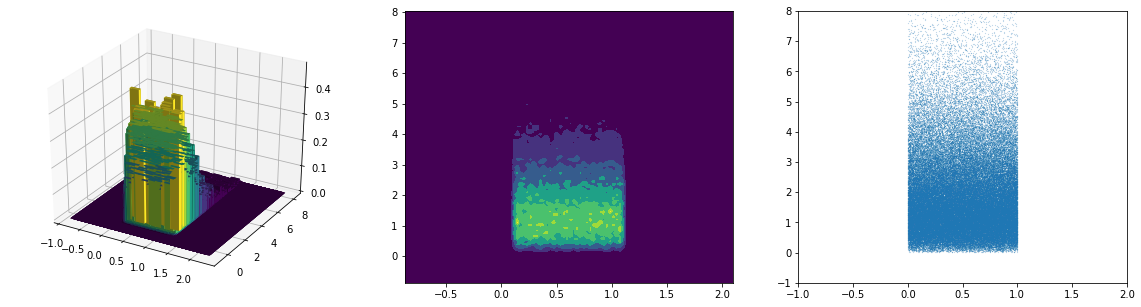

In [82]:
plot_hist_contour(uniform.rvs(loc=0, scale=1, size=100000), gamma.rvs(a=2, loc=0, scale=1, size=100000), [-1, 2], [-1, 8], 100_000, 100)

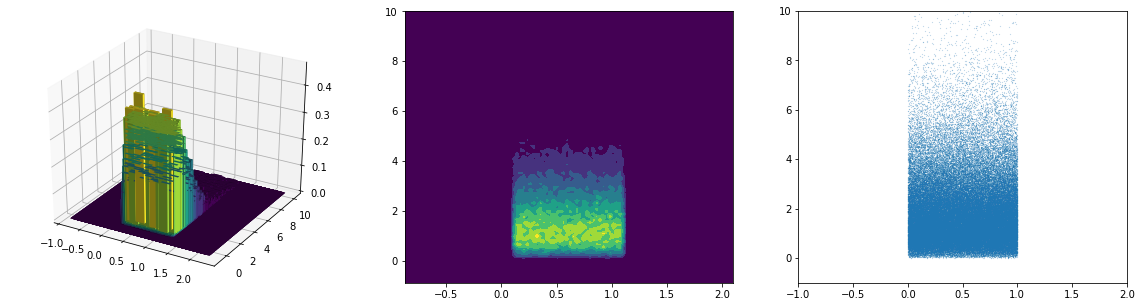

In [88]:
plot_hist_contour(rvs_z_1, rvs_z_2, [-1, 2], [-1, 10], 100_000, 100)

In [91]:
from scipy.stats.mstats import pearsonr
from scipy.stats.mstats import spearmanr

print("Covariation matrix: \n", np.cov(rvs_z_1, rvs_z_2))
print("Pearson coeff:", pearsonr(rvs_z_1, rvs_z_2)[0])
print("Spearman coeff:", spearmanr(rvs_z_1, rvs_z_2)[0])

Covariation matrix: 
 [[8.34478769e-02 1.95504795e-03]
 [1.95504795e-03 2.00424458e+00]]
Pearson coeff: 0.004780511964733672
Spearman coeff: 0.005214120161369462


## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

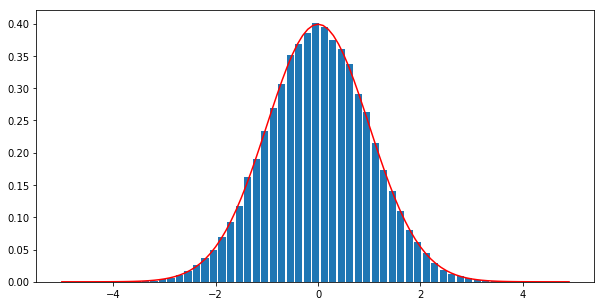

In [96]:
from scipy.stats import norm

def task_5(n):
    fig = plt.figure(figsize=(10, 5))
    mu = np.matrix([[1], 
                    [-1]])
    cov = np.matrix([[2, -0.5], 
                    [-0.5, 1]])

    rvs_1 = norm.rvs(loc=0, scale=1, size=n)
    rvs_2 = norm.rvs(loc=0, scale=1, size=n)

    A = np.linalg.cholesky(cov).flat
    a_11, a_12, a_21, a_22 = A
    rvs_z_1 = a_11*rvs_1 + mu.A[0][0]
    rvs_z_2 = a_21*rvs_2 + a_22*rvs_2 + mu.A[1][0]

    plt.hist(rvs_1, density=True, rwidth=0.85, bins=50)
    plt.plot(np.arange(-5, 5, 0.1), norm.pdf(np.arange(-5, 5, 0.1), loc=0, scale=1), 'r')
    plt.show()
    return rvs_z_1, rvs_z_2

rvs_z_1, rvs_z_2 = task_5(100_000)

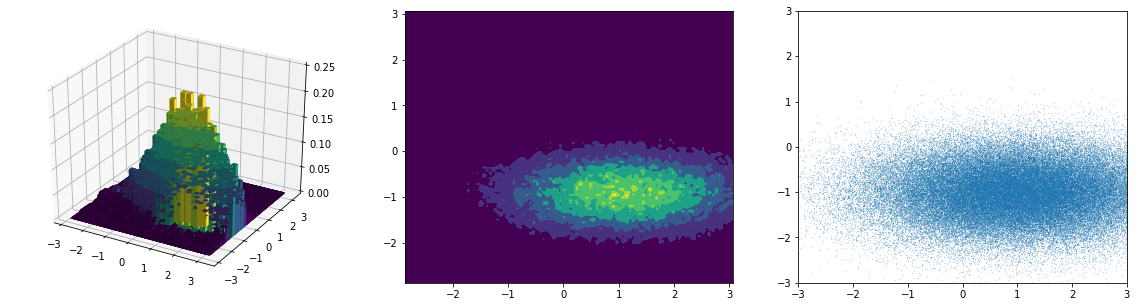

In [98]:
plot_hist_contour(rvs_z_1, rvs_z_2, [-3, 3], [-3, 3], 100_000, 100)

In [99]:
print("Covariation matrix: \n", np.cov(rvs_z_1, rvs_z_2))
print("Pearson coeff:", pearsonr(rvs_z_1, rvs_z_2)[0])
print("Spearman coeff:", spearmanr(rvs_z_1, rvs_z_2)[0])

Covariation matrix: 
 [[ 1.99194208e+00 -1.53787602e-03]
 [-1.53787602e-03  3.38082246e-01]]
Pearson coeff: -0.001874009501319234
Spearman coeff: -0.0014544166101855271


### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $u_1, u_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $u_1, u_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Тоді
$$
\begin{aligned}
\xi_1 &= F^{-1}(u_1) \sim Exp(1), \\
\xi_2 &= F^{-1}(u_2) \sim Exp(1), \\
\xi_1^a &= F^{-1}(1-u_1) \sim Exp(1), \\
\xi_2^a &= F^{-1}(1-u_2) \sim Exp(1),
\end{aligned}
$$
де $F$ &mdash; функція розподілу стандартного експоненційного розподілу.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta_1 \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2^a + \eta_2 \xi_1^a \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&2 p (1 - p)(-0.6449) - (1 - p)^2, & p \geq 1/2, \\
&2 p (1 - p)(-0.6449) - p^2, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $u_1, u_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\xi_1, \xi_2, \xi_1^a, \xi_2^a, \zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1^a$;
   - функцію щільності випадкової величини $\xi_1^a$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2^a$;
   - функцію щільності випадкової величини $\xi_2^a$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

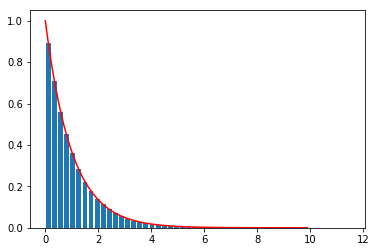

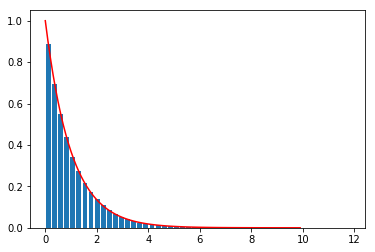

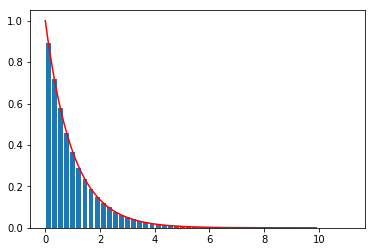

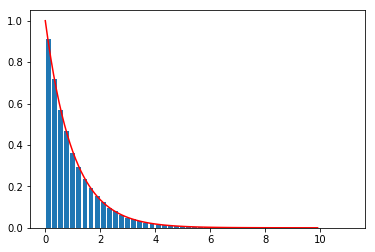

In [105]:
from scipy.stats import expon
from functools import partial
hist = partial(plt.hist, density=True, rwidth=0.8, bins=50)

n = 100_000
p = 0.5

F = expon(0, 1).ppf

unif_1 = uniform(0, 1).rvs(size=n)
unif_2 = uniform(0, 1).rvs(size=n)
e_1 = bernoulli(p).rvs(size=n)
e_2 = bernoulli(p).rvs(size=n)

ksi_1 = F(unif_1)
ksi_2 = F(unif_2)
ksi_a_1 = F(1 - unif_1)
ksi_a_2 = F(1 - unif_2)

x = np.arange(0, 10, 0.1)

hist(ksi_1)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

hist(ksi_2)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

hist(ksi_a_1)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

hist(ksi_a_2)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

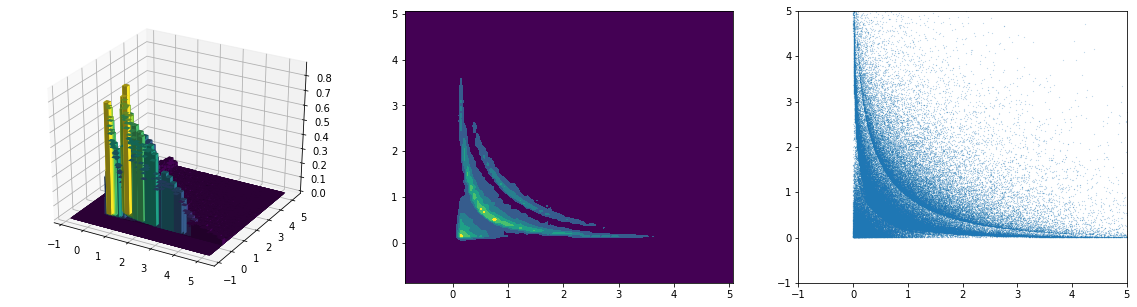

In [109]:
rvs_z_1 = (1 - p)*ksi_1 + e_1*ksi_2
rvs_z_2 = (1 - p)*ksi_a_2 + e_2*ksi_a_1

plot_hist_contour(rvs_z_1, rvs_z_2, [-1, 5], [-1, 5])

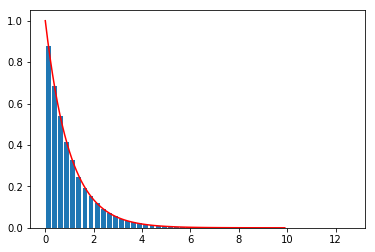

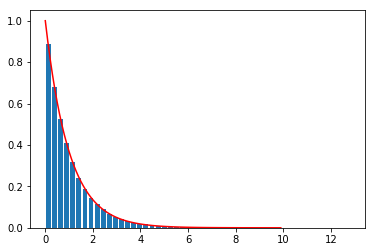

In [110]:
x = np.arange(0, 10, 0.1)

hist(rvs_z_1)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

hist(rvs_z_2)
plt.plot(x, expon(0, 1).pdf(x), 'r')
plt.show()

In [111]:
print("Theoretical correltaion: ", 2*p*(1 - p)*(-0.65) - (1 - p)**2)
print("Covariation matrix: \n", np.cov(rvs_z_1, rvs_z_2))
print("Pearson coeff:", pearsonr(rvs_z_1, rvs_z_2)[0])
print("Spearman coeff:", spearmanr(rvs_z_1, rvs_z_2)[0])

Theoretical correltaion:  -0.575
Covariation matrix: 
 [[ 0.9956043  -0.32606493]
 [-0.32606493  1.01258281]]
Pearson coeff: -0.3247472116435392
Spearman coeff: -0.38960995483278893


### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta_1} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - (1-\xi_2)^{(1 - p)} (1-\xi_1)^{\eta_2} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&\frac{-3 (1-p) (4 + 5(1-p) + 6(1-p)^2 + (1-p)^3)}{(2-p)^2 (3-p)^2}, & p \geq 1/2, \\
&\frac{-3 p (2 + 3(1-p) - (1-p)^2)}{(2-p)^2 (3-p)}, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

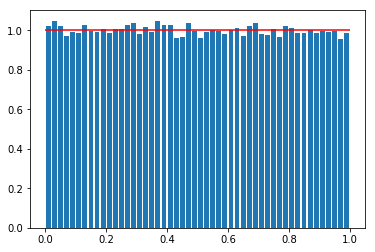

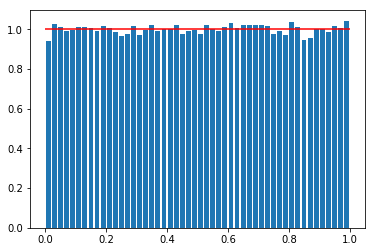

In [124]:
n = 100_000
p = 0.5

rvs_1 = uniform(0, 1).rvs(size=n)
rvs_2 = uniform(0, 1).rvs(size=n)
e_1 = bernoulli(p).rvs(size=n)
e_2 = bernoulli(p).rvs(size=n)

rvs_z_1 = 1 - rvs_1**(1 - p)*rvs_2**e_1
rvs_z_2 = 1 - (1 - rvs_2)**(1 - p)*(1 - rvs_1)**e_2

hist(rvs_1)
plt.hlines(1, 0, 1, 'r')
plt.show()

hist(rvs_2)
plt.hlines(1, 0, 1, 'r')
plt.show()


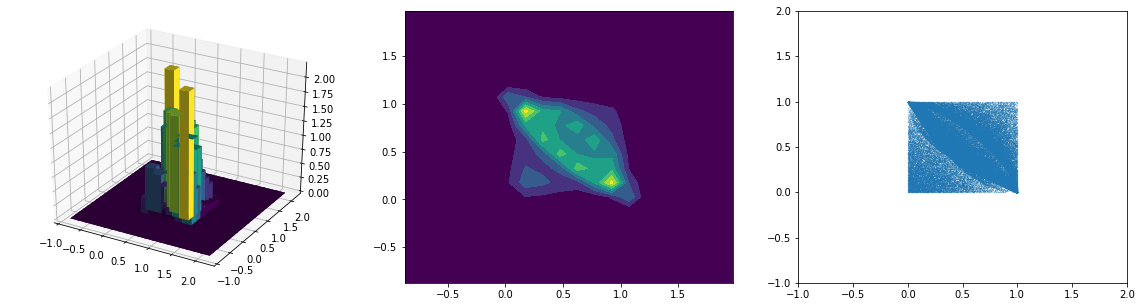

In [117]:
 plot_hist_contour(rvs_z_1, rvs_z_2, [-1, 2], [-1, 2], n_bins = 20)

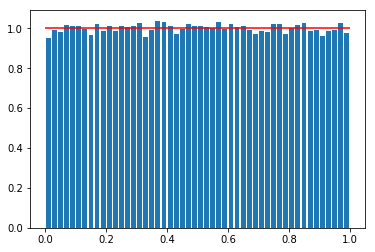

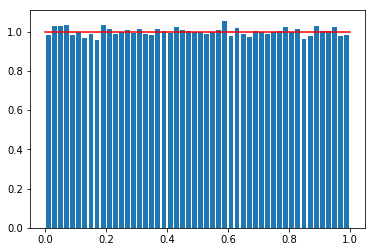

In [132]:
t = np.arange(0, 1.1, 0.1)

hist(rvs_z_1)
plt.hlines(1, 0, 1, 'r')
plt.show()

hist(rvs_z_2)
plt.plot(t, uniform(0, 1).pdf(t), 'r')
plt.show()


In [133]:
def corr_2(p):
    if p > 0.5:
        return -3*(1 - p)*(4 + 5*(1 - p) + 6*(1 - p**2) + (1-p)**3) / ((2 - p)**2 * (3 - p))
    else:
        return  (-3*p*(2 + 3*(1 - p) - (1 - p)**2)) / ((2 - p)**2 *(3 - p))
    

print("Theoretical correltaion: ",corr_2(p))
print("Covariation matrix: \n", np.cov(rvs_z_1, rvs_z_2))
print("Pearson coeff:", pearsonr(rvs_z_1, rvs_z_2)[0])
print("Spearman coeff:", spearmanr(rvs_z_1, rvs_z_2)[0])

Theoretical correltaion:  -0.8666666666666667
Covariation matrix: 
 [[ 0.08283742 -0.03153867]
 [-0.03153867  0.08329156]]
Pearson coeff: -0.3796903846605575
Spearman coeff: -0.37949504822226543
